# 분포 시각화 (Distribution Visualization)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

sns.set(style="whitegrid")
warnings.filterwarnings(action='ignore')
plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False

## 일변량 분포 (Univariate distributions)

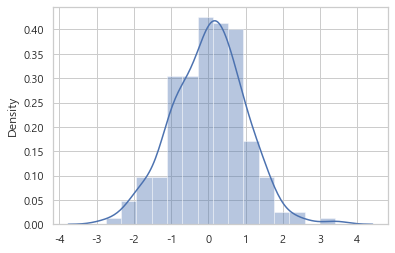

In [2]:
x = np.random.randn(200)
sns.distplot(x);

### 히스토그램 (Histograms)

**kde, rug**  
kde옵션은 distplot의 바깥쪽 곡선을 조절하는 것이며,  
rug옵션을 이용하여 x축에 분포에 대한 정보를 시각화할 수 있다.

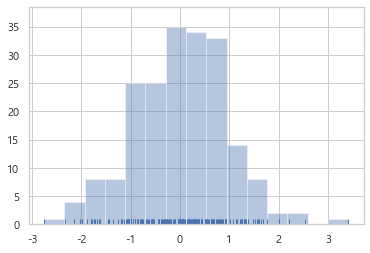

In [3]:
sns.distplot(x, kde=False, rug=True);

**bins=int**  
bins 옵션을 통해 막대의 간격을 세분화할 수 있다.

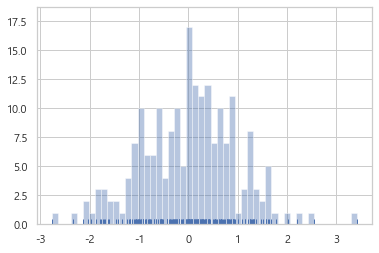

In [4]:
sns.distplot(x, bins=50, kde=False, rug=True);

### 커널 밀도 추정 (Kernel Density Estimation)

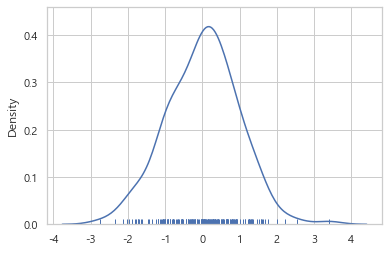

In [5]:
sns.distplot(x, hist=False, rug=True);

**kdeplot**  
distplot은 다음 버전에서 사라질 가능성이 있다.  
그렇기 때문에 hist나 barplot으로 대체 될텐데  
만약 연속적인 데이터의 밀도함수 그래프의 시각화 시 kdeplot을 이용한다.

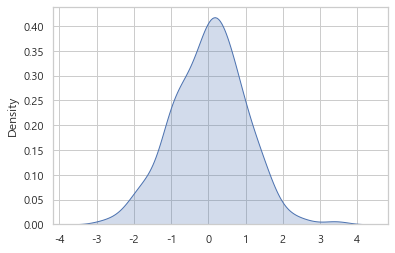

In [6]:
# shade = True를 통해 곡선 아래쪽 면적을 색칠할 수 있다.
sns.kdeplot(x, shade=True);

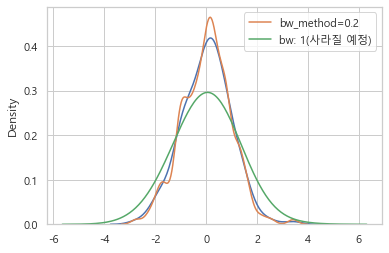

In [7]:
sns.kdeplot(x)
sns.kdeplot(x, bw_method=.2, label='bw_method=0.2')
sns.kdeplot(x, bw=1, label='bw: 1(사라질 예정)')
plt.legend();

**kdeplot에서 cut은 극단값을 얼마나 제외해줄 건지를 지정해줌**

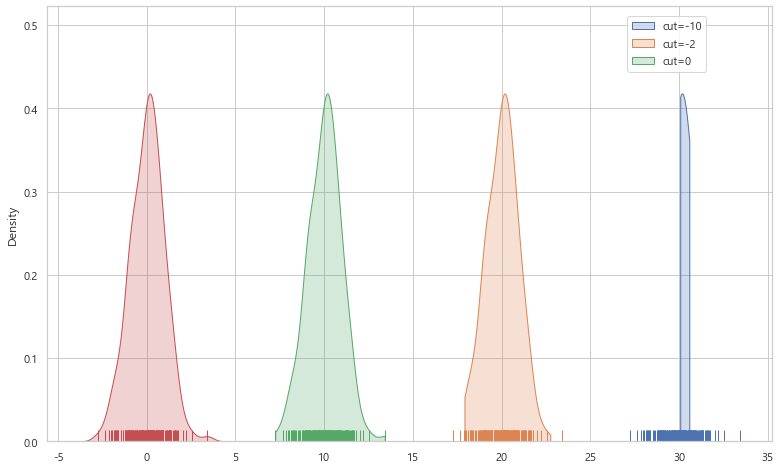

In [8]:
plt.figure(figsize=(13, 8))
sns.kdeplot(x+30, shade=True, cut=-10,label='cut=-10')
sns.kdeplot(x+20, shade=True, cut=-2, label='cut=-2')
sns.kdeplot(x+10, shade=True, cut=0, label='cut=0')
sns.kdeplot(x, shade=True)
sns.rugplot(x+30)
sns.rugplot(x+20)
sns.rugplot(x+10)
sns.rugplot(x)
plt.legend(loc=(0.8, 0.85));

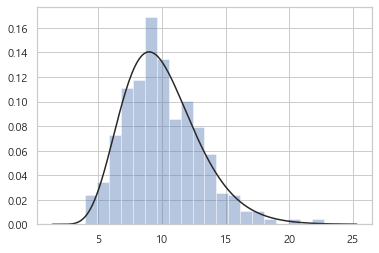

In [9]:
x = np.random.gamma(10, size=500)
sns.distplot(x, kde=False, fit=stats.gamma);
# fit를 통해 이 데이터가 어떠한 분포(예시에선 gamma분포)와 유사한지를 비교할 수 있다

## 이변량 분포 ( Bivariated Distributions )

### 산점도(Scatterplots)
- `joinplot`: 두개의 변수 간의 이변량 (또는 joint)관계와 별도의 축에 각각의 일변량 (또는 marginal)분포 모두 표시되는 다중 패널 플롯 생성

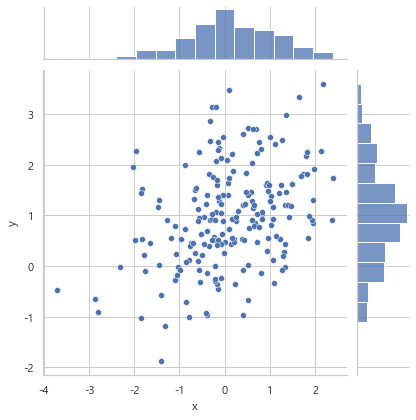

In [13]:
mean = [0,1]
cov = [(1, .3), (.3, 1)]

data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data=data, columns=['x','y'])

sns.jointplot(x='x', y='y',data=df);

### 육각 빈 플롯(Hexbin plots)

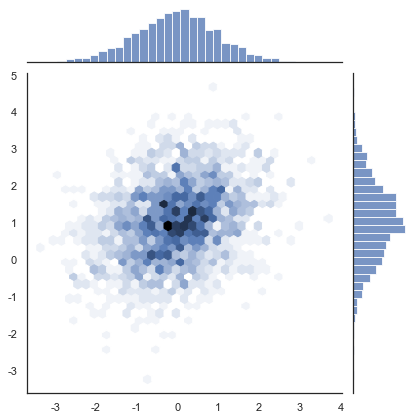

In [14]:
x, y = np.random.multivariate_normal(mean, cov, 2000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind='hex');

### 커널 밀도 추정(Kernel density estimation)

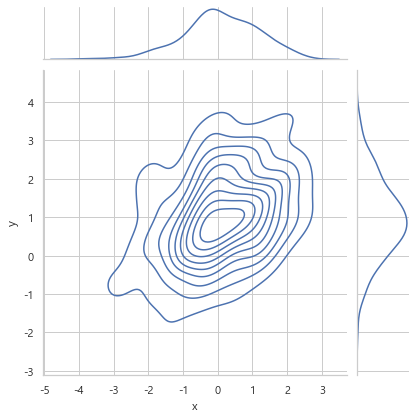

In [17]:
sns.jointplot(x='x', y='y', data=df, kind='kde');

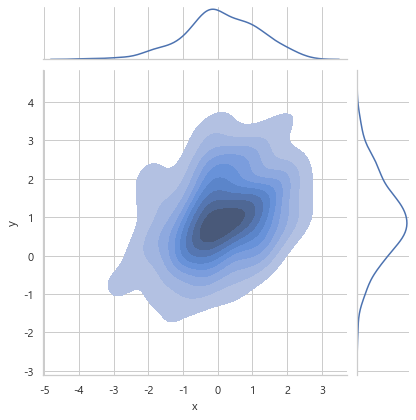

In [18]:
sns.jointplot(x='x',y='y', data=df, kind='kde', shade=True);

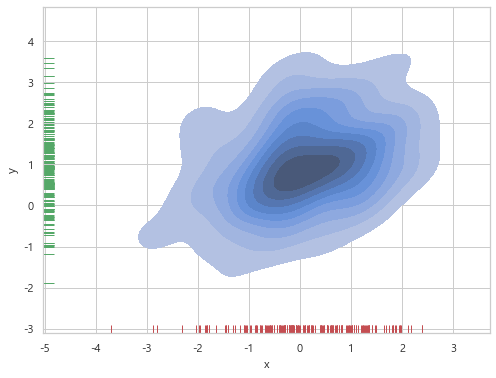

In [23]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df.x, df.y, shade=True)
sns.rugplot(df.x, color='r')
sns.rugplot(df.y, color='g', vertical=True);

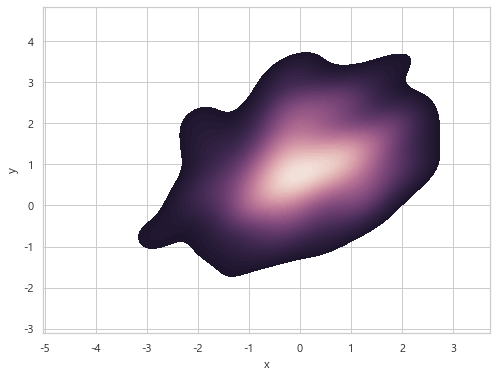

In [29]:
plt.figure(figsize=(8, 6))
cmap=sns.cubehelix_palette(as_cmap=True, dark=0.1, light=0.9, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

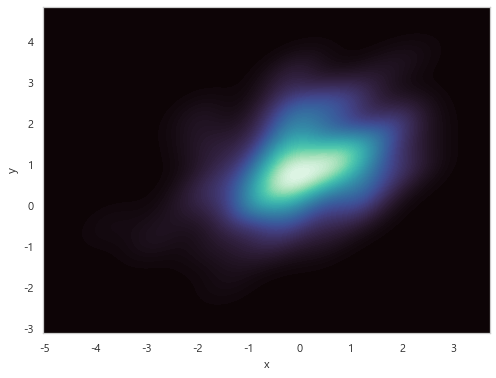

In [38]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df.x, df.y, thresh=0., levels=100, 
            cmap='mako', n_levels=100, shade=True);

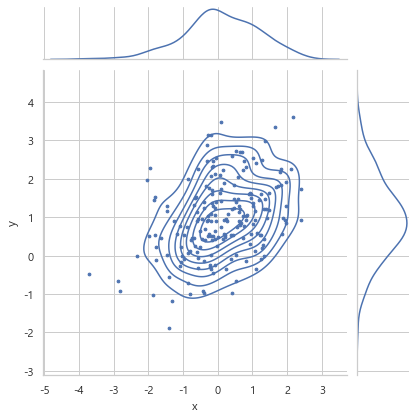

In [51]:
g = sns.jointplot(x='x',y='y', data=df, kind='kde')
g.plot_joint(plt.scatter, s=30, linewidth=1, marker='.')
g.ax_joint.collections[0].set_alpha(0);

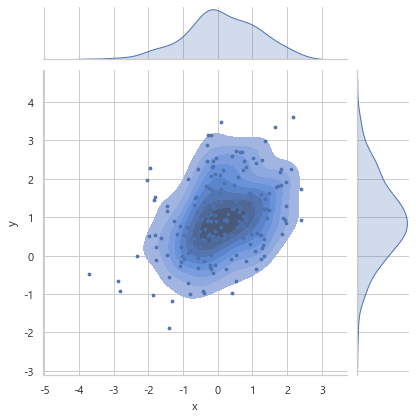

In [53]:
g = sns.jointplot(x='x', y='y', data=df, kind='kde', fill=True)
g.plot_joint(plt.scatter, s=30, linewidth=1, marker='.')
g.ax_joint.collections[0].set_alpha(0);